In [1]:
# Multilayer Percepton (MLP) - Utilizada para problemas de classificação e regressão.

import pandas as pd

uploaded = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
#table = pd.read_csv(uploaded)


########## REMOVENDO PRIMEIRA COLUNA ##########
newNames = ['ID Number','RI: Refractive Index','Na: Sodium','Mg: Magnesium','Al: Aluminium','Si: Silicon','K: Potassium','Ca: Calcium','Ba: Barium','Fe: Iron','Type of glass']
table = pd.read_csv(uploaded, names=newNames, skiprows=0, delimiter=',')
table.drop(["ID Number"], axis=1, inplace=True)
print(table)

     RI: Refractive Index  Na: Sodium  Mg: Magnesium  Al: Aluminium  \
0                 1.52101       13.64           4.49           1.10   
1                 1.51761       13.89           3.60           1.36   
2                 1.51618       13.53           3.55           1.54   
3                 1.51766       13.21           3.69           1.29   
4                 1.51742       13.27           3.62           1.24   
..                    ...         ...            ...            ...   
209               1.51623       14.14           0.00           2.88   
210               1.51685       14.92           0.00           1.99   
211               1.52065       14.36           0.00           2.02   
212               1.51651       14.38           0.00           1.94   
213               1.51711       14.23           0.00           2.08   

     Si: Silicon  K: Potassium  Ca: Calcium  Ba: Barium  Fe: Iron  \
0          71.78          0.06         8.75        0.00       0.0   
1        

In [2]:
# Sklearn para treinar MPL
# [TESTE 1] Pega aleatoriamente 75% dos dados PARA treinamento e 25% PARA teste.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = np.array(table)

data = data[:, 1:]                        # Comentar linha caso a primeira coluna não seja útil

# Identifica nomes das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

scaler = StandardScaler()

y = np.array(pd.get_dummies(data[:, data.shape[1]-1])).astype(np.float32)
x = (data[:, :(data.shape[1]-1)]).astype(np.float32)

scaler.fit(x) # Ajusta scaler pré-processamento

# Gera conjunto de treinamento e teste
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.25)        # 0.25 é o tamanho dos dados no conjunto de teste

In [5]:
# [TESTE 2] Em CADA classe ele pega 75% dos dados no treinamento e 25% restantes no conjunto de teste.


########################################################################################################################
# EXECUTAR SÓ APÓS TERMINAR O TESTE ANTERIOR (AO EXECUTAR ESSE TESTE, DEVERÁ SER EXECUTADO OS TESTES ABAIXO NOVAMENTE) #
########################################################################################################################


# Formação dos conjuntos de treinamento e teste
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = np.array(table)

data = data[:, 1:]                        # Comentar linha caso a primeira coluna não seja útil

scaler = StandardScaler()
scaler.fit(data[:, :(data.shape[1]-1)])   # Ajustando scaler para pré-processamento

# Indentificando nomes das classes
labels = []
for line in range(data.shape[0]):
  if(labels.count(data[line, data.shape[1]-1])==0):
    labels.append(data[line, data.shape[1]-1])

# Contando o número de dados (amostras) em cada classe
num_labels = []
ctrl = []                                 # Lista onde separa treinamento e teste
for label in labels:
  count = 0
  for line in range(data.shape[0]):
    if(label == data[line, data.shape[1]-1]):
      count = count + 1
  num_labels.append(count)
  ctrl.append(0)

train_p = 0.75                            # 0.75 é o % dos dados que está na lista de treinamento
for i in range(len(num_labels)):
  num_labels[i] = round(num_labels[i] * train_p)

train = int(0)
test = int(0)

# Separa os conjuntos de treinamento e de teste
for line in range(data.shape[0]):
  for label in labels:
    if(label == data[line, data.shape[1]-1]):      
      aux = labels.index(label) 
      
      if (ctrl[aux] < num_labels[aux]):
        if (type(train) is int):
          train = data[line, :]
        else:
          train = np.row_stack((train, data[line, :]))      
      else:
        if (type(test) is int):
          test = data[line, :]
        else:
          test = np.row_stack((test, data[line, :]))
      ctrl[aux] = ctrl[aux]+1
      break

train_x = (train[:, :train.shape[1]-1]).astype(np.float32)                         # Entrada(s) de treinamento
train_y = np.array(pd.get_dummies(train[:, train.shape[1]-1])).astype(np.float32)  # Saída(s) das classes de treinamento
test_x = (test[:, :test.shape[1]-1]).astype(np.float32)                            # Entrada(s) de teste
test_y = np.array(pd.get_dummies(test[:, test.shape[1]-1])).astype(np.float32)     # Saída(s) das classes de teste

[Entradas = 8] ----- [Saídas = 6]
Número de camadas ocultas: 2
Neurônios na 1ª camada oculta: 10
Neurônios na 2ª camada oculta: 5
Número de épocas de treinamento: 2000
MLPClassifier(alpha=0.01, hidden_layer_sizes=(10, 5), learning_rate='adaptive',
              learning_rate_init=0.4, max_iter=2000, momentum=0.3,
              random_state=121, solver='sgd', verbose=0)
Topologia da MLP = [8, 10, 5, 6]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Text(0, 0.5, 'Perdas')

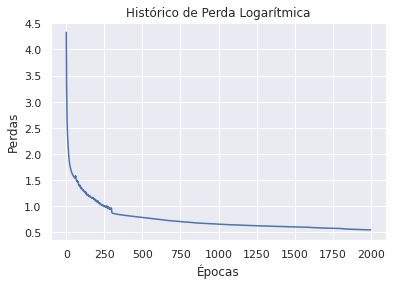

In [6]:
# Etapa de Topologia e Treinamento

import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Escolhe quantidade de neurônio na camada de entrada e saída
num_x = train_x.shape[1]
num_y = train_y.shape[1]
print('[Entradas = %i] ----- [Saídas = %i]' % (num_x, num_y))

#'''
while(True):
  num_hidden_layers = int(input('Número de camadas ocultas: '))
  if(num_hidden_layers>0):
    break

if(num_hidden_layers==1):
  while(True):
    topology = [int(input('Neurônios na camada oculta: '))]
    if(topology[0]>0):
      break
else:
  topology = []
  for i in range(num_hidden_layers):
    while(True):
      num = int(input('Neurônios na %iª camada oculta: ' % (i+1)))
      if(num>0):
        topology.append(num)
        break

epochs = int(input('Número de épocas de treinamento: '))
#'''

# Inicialização do modelo
# Testaremos a inicialização: N entradas (4 ou 9, por exemplo), 1º camada 10 neuronios, 2º camada 5 neuronios, saída com 3 neurônios

Model = MLPClassifier(hidden_layer_sizes=tuple(topology), # Tamanhos de camada oculta
                      #hidden_layer_sizes = (10, 5),      # **COMENTAR SE FOR UTILIZAR LINHA ACIMA**
                      max_iter=epochs,                    # Número máximo de épocas (usando 2000)
                      #max_iter = 2000,                   # **COMENTAR SE FOR UTILIZAR LINHA ACIMA**
                      alpha=0.01,                         # Encerra treinamento após erro médio quadrático ficar abaixo de um valor α pré-definido (0.01 no primeiro treinamento e os próximos ajustáveis), [salvando=0.1]
                      solver='sgd',                       # Descida Gradiente Estocástigo (SGD) como estratégia
                      learning_rate_init=0.4,             # Taxa de aprendizagem (varia de 0.1 a 1.0, sugestão de 0.4) [salvando=0.01]
                      momentum=0.3,                       # Aumenta velocidade de treinamento da rede e reduz perigo de instabildiade (0=não usa, até 1.0; recomendado=0.3) [salvando=0.9]
                      learning_rate='adaptive',           # Taxa adaptativa
                      verbose=0,                          # Verbose para ver o que está acontecendo em cada época (2 = ativar)
                      random_state=121)                   # Estádos aleatórios

topology.insert(0, num_x)
topology.append(num_y)

# pré-processamento
p_train_x = scaler.transform(train_x)

# treinando o modelo
model = Model.fit(p_train_x, train_y)

print(model)
print('Topologia da MLP =', topology) #N na entrada; N na escondida, N na escondida..., N na saída)

# exibindo a curva de perda logarítmica
plt.plot(model.loss_curve_)
plt.title('Histórico de Perda Logarítmica') # Pode utilizar em problemas de classificação
plt.xlabel('Épocas')
plt.ylabel('Perdas')

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        52
           1       0.95      0.91      0.93        57
           2       0.00      0.00      0.00        13
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         7
           5       1.00      0.95      0.98        22

   micro avg       0.93      0.86      0.89       161
   macro avg       0.80      0.80      0.80       161
weighted avg       0.86      0.86      0.86       161
 samples avg       0.86      0.86      0.86       161

A acurácia/acerto foi de: 0.8571428571428571 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


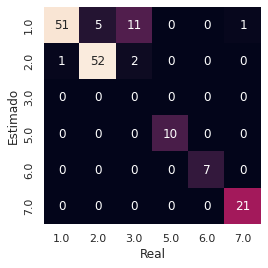

In [7]:
# Etapa de análise do "conjunto de treinamento"
# [TESTE 1] Pega aleatoriamente 75% dos dados PARA treinamento e 25% PARA teste.

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


train_est_y = model.predict(p_train_x)


# Exibirá matriz de confusão; com seus acertos e erros.
# * Exemplo_01: se acertou 51 do "nº 1 (ou 1.0)", então acertou 51 "building_windows_float_processed" - e errou 1.
# > Type of glass: (class attribute)
# - 1 building_windows_float_processed [janelas de construção flutuam processadas]
# - 2 building_windows_non_float_processed [construção de janelas não flutuantes processadas]
# - 3 vehicle_windows_float_processed [janelas do veículo flutuam processadas]
# - 4 vehicle_windows_non_float_processed (none in this database) [janelas do veículo processadas sem flutuação (nenhuma neste banco de dados)]
# - 5 containers [recipientes]
# - 6 tableware [talheres]
# - 7 headlamps [faróis]

mat = confusion_matrix(train_y.argmax(axis=1), train_est_y.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');


print(classification_report(train_y, train_est_y))                                # Exibir relatório
print('A acurácia/acerto foi de:', accuracy_score(train_est_y, train_y), "\n")    # Exibir acurácia

              precision    recall  f1-score   support

           0       0.50      0.22      0.31        18
           1       0.48      0.68      0.57        19
           2       0.00      0.00      0.00         4
           3       0.50      0.67      0.57         3
           4       1.00      1.00      1.00         2
           5       0.88      1.00      0.93         7

   micro avg       0.57      0.53      0.55        53
   macro avg       0.56      0.60      0.56        53
weighted avg       0.52      0.53      0.50        53
 samples avg       0.51      0.53      0.52        53

A acurácia/acerto foi de: 0.49056603773584906 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


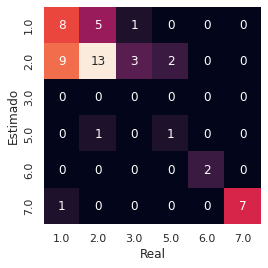

In [8]:
# Etapa de análise do "conjunto de teste"
# [TESTE 2] Em CADA classe ele pega 75% dos dados no treinamento e 25% restantes no conjunto de teste.

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Pré-processamento
p_test_x = scaler.transform(test_x)
test_est_y = model.predict(p_test_x)


# Exibirá matriz de confusão; com seus acertos e erros.
# * Exemplo_01: se acertou 14 do "nº 1 (ou 1.0)", então acertou 14 "building_windows_float_processed" - e errou 5.
# > Type of glass: (class attribute)
# - 1 building_windows_float_processed
# - 2 building_windows_non_float_processed
# - 3 vehicle_windows_float_processed
# - 4 vehicle_windows_non_float_processed (none in this database)
# - 5 containers
# - 6 tableware
# - 7 headlamps

mat = confusion_matrix(test_y.argmax(axis=1), test_est_y.argmax(axis=1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');


print(classification_report(test_y, test_est_y))                                # Exibir relatório
print('A acurácia/acerto foi de:', accuracy_score(test_est_y, test_y), "\n")    # Exibir acurácia